In [3]:
import pandas as pd

file_path = 'CreditRiskData.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
# Check for missing values (nulls) in the dataset by summing the number of nulls in each column
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [5]:
# Count the frequency of each unique row (combination of values across all columns) in the dataset
df.value_counts()

# Why?
# This step helps identify duplicate records, which might indicate data entry errors or repeated observations.
# In credit risk prediction, duplicates can bias model training because certain patterns might be overrepresented.
# Identifying frequent or duplicated rows is useful for deciding whether to drop them or investigate further.

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [6]:
# Drop rows with any missing values (NaN) from the dataset
df = df.dropna()

In [7]:
# Check again for any remaining missing values in the dataset after dropping rows with nulls
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='income'>

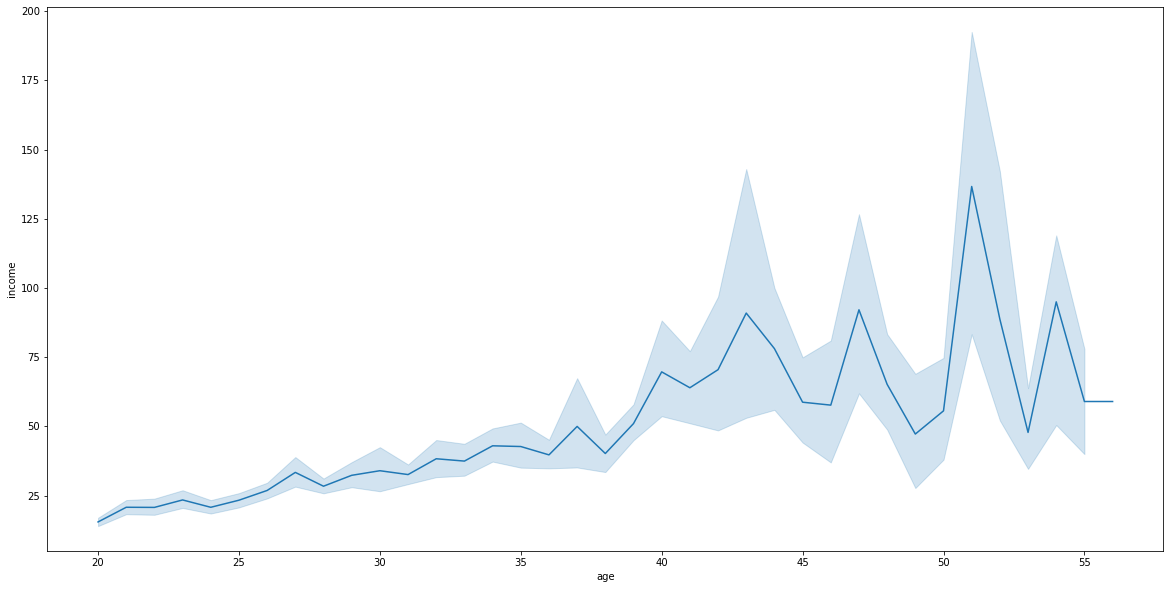

In [8]:
# Import visualization libraries: matplotlib for basic plotting and seaborn for advanced statistical graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure and axes with a specified size (20x10 inches)
fig,ax = plt.subplots(figsize=(20,10))

# Plot a line plot showing the relationship between 'age' and 'income' in the dataset
sns.lineplot(x='age',y='income',data=df,ax=ax)

# Why?
# In credit risk prediction, the relationship between age and income might reveal correlations with default risk.
# For example, higher income at certain ages might indicate financial stability, influencing risk assessment.
# This exploratory analysis helps in deciding which features to use for modeling and how to preprocess them.

<AxesSubplot:xlabel='age', ylabel='debtinc'>

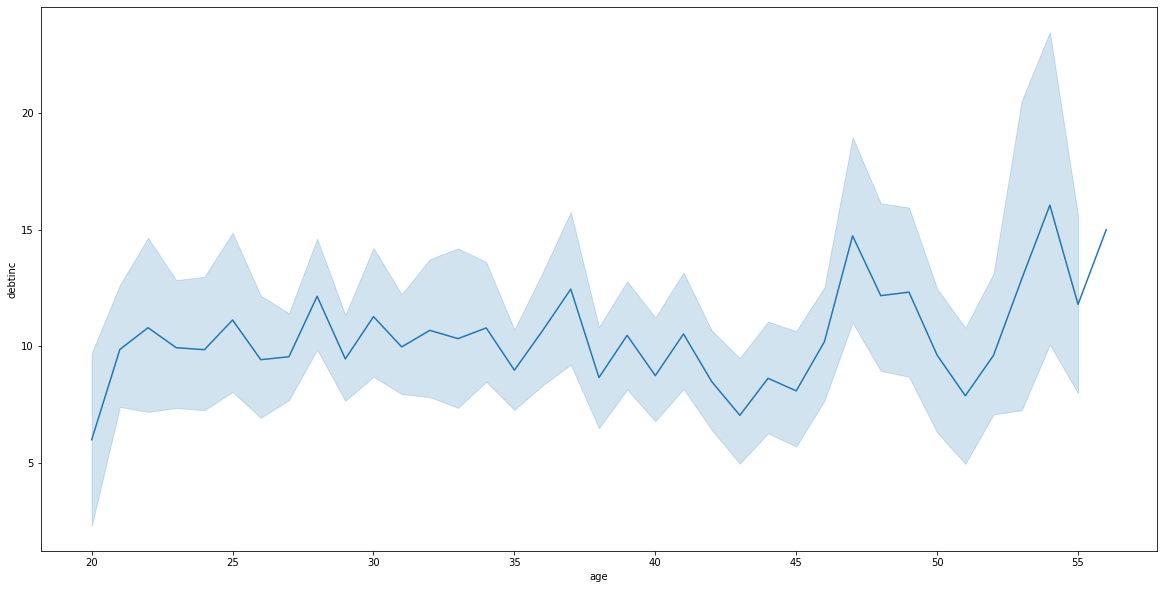

In [9]:
# Create a new figure and axes with a specified size (20x10 inches)
fig,ax = plt.subplots(figsize=(20,10))

# Plot a line plot showing the relationship between 'age' and 'debtinc' (debt-to-income ratio) in the dataset
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [10]:
# Count the number of occurrences of each unique value in the 'default' column
df['default'].value_counts()

# Why?
# This shows how many customers in the dataset defaulted on their credit and how many did not.
# It’s essential for understanding class imbalance.
# If one class (e.g., non-default) dominates, models may become biased toward it, reducing predictive power.
# Helps in deciding whether techniques like resampling (oversampling, undersampling) or class weighting are needed during model training.

0.0    517
1.0    183
Name: default, dtype: int64

In [11]:
# Split the dataset into features (x) and target variable (y)

# All columns except 'default' form the feature matrix (x)
x=df.drop(['default'],axis=1)

# The 'default' column is the target variable (y), indicating if the customer defaulted
y=df['default']

# Why?
# For credit risk prediction, we aim to predict a customer's credit default status (y) based on various factors (x) such as age, income, and debt-to-income ratio.
# Splitting the dataset into x and y is essential for supervised learning, where models learn patterns in x to predict y.
# This setup ensures that our machine learning model focuses on identifying features that contribute to the risk of default.

In [12]:
# Display the first 5 rows of the feature matrix (x) to review the selected features
x.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564


In [13]:
# Display the first 5 rows of the target variable (y) to review the default values
y.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: default, dtype: float64

In [14]:
# Import train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Why?
# This separates the dataset into two parts: 80% for training the model and 20% for testing its performance.
# A test size of 0.2 (20%) is a common choice to ensure the model is evaluated on unseen data.
# The random_state parameter ensures reproducibility of the split, which is essential for consistent results.
# This step prepares the data for model training and validation, ensuring that the model generalizes well and avoids overfitting.

In [21]:
# Import StandardScaler from scikit-learn's preprocessing module for feature scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Fit the scaler on the training data and transform it (standardize)
xtrain = sc.fit_transform(xtrain)

xtest = sc.fit_transform(xtest)


# Why?
# Feature scaling is crucial in credit risk prediction because features like income, age, and debtinc might have vastly different scales.
# Standardizing ensures that all features contribute equally to the model, improving performance, especially for algorithms like logistic regression, SVMs, or KNN.
# Using fit_transform on xtrain calculates the scaling parameters (mean and std) from the training data, while transform on xtest applies the same scaling.
# This prevents data leakage from test data into the model training process.

In [16]:
#Creating Model

# Import the RandomForestClassifier from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with 200 decision trees
rfc = RandomForestClassifier(n_estimators=200)

# Why?
# Random Forest is a robust ensemble learning method that builds multiple decision trees and combines their predictions.
# It works well for classification problems like credit risk prediction, as it can handle imbalanced datasets and complex relationships between features.
# Setting n_estimators=200 specifies that the model should create 200 trees, increasing model stability and performance.
# This step creates the model object (rfc), which will later be trained on the dataset to predict customer credit default.

In [17]:
# Train the Random Forest Classifier on the training data
rfc.fit(xtrain, ytrain)

# Why?
# This step fits (trains) the Random Forest model on the training set.
# It learns the relationships between input features (xtrain) and the target variable (ytrain), identifying patterns in the data.
# After training, the model can make predictions on new, unseen data (like xtest) to assess credit risk.

RandomForestClassifier(n_estimators=200)

In [18]:
# Evaluate the accuracy of the trained Random Forest model on the test set
rfc.score(xtest,ytest)

# Why?
# This computes the model's accuracy, which is the proportion of correct predictions on the test data.
# It gives a quick indication of how well the model performs in predicting credit risk for unseen data.

0.8

In [19]:
# Import the cross_val_score function from scikit-learn's model_selection module
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation using the Random Forest model
rfc2 = cross_val_score(estimator = rfc, X=xtrain, y=ytrain, cv=10)

# Compute the mean cross-validation accuracy
rfc2.mean()

# Why?
# Cross-validation evaluates the model's performance by splitting the training data into 10 parts (folds),
# training on 9 parts and testing on 1 part in each iteration.
# This provides a more reliable estimate of the model's performance than a single train-test split,
# reducing the risk of overfitting or underfitting.
# The mean cross-validation score (accuracy) indicates the model's average performance across folds,
# offering a better sense of its ability to generalize to new credit risk data.

0.7875

In [20]:
### SVM

In [22]:
# Import the Support Vector Classifier (SVC) from scikit-learn's SVM module
from sklearn.svm import SVC

# Initialize the SVM model with default parameters
sv = SVC()

# Train (fit) the SVM model on the training data
sv.fit(xtrain,ytrain)

# Why?
# SVM is a powerful classification algorithm that works well for binary classification tasks like credit risk prediction.
# It aims to find the best hyperplane that separates classes (default vs. non-default) by maximizing the margin between them.
# Training the model on the scaled features (xtrain) and labels (ytrain) allows it to learn patterns in the data.
# The trained model (sv) can then be used to predict credit default on unseen data (xtest).

SVC()

In [23]:
# Evaluate the accuracy of the trained SVM model on the test set
sv.score(xtest,ytest)

# Why?
# This returns the accuracy of the SVM model, which is the proportion of correct predictions made on the test data.
# Accuracy measures how often the model correctly predicts whether a customer will default or not.

0.7928571428571428

In [24]:
# Import GridSearchCV from scikit-learn's model_selection module
from sklearn.model_selection import GridSearchCV

# Set up GridSearchCV to perform hyperparameter tuning on the SVM model (sv)
# sv--> The base model (SVC) to be tuned
# C--> Regularization parameter values to test
# gamma--> Kernel coefficient for 'rbf'
# kernel--> Kernel types to test (RBF and linear)
model = GridSearchCV(sv , {
    'C': [0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma': [0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel': ['rbf','linear']
},scoring='accuracy',cv=10)

# Use accuracy as the metric to select the best hyperparameters
# Use 10-fold cross-validation to evaluate each combination

# Why?
# GridSearchCV systematically tests combinations of hyperparameters to find the best settings for the model.
# Tuning C (regularization) and gamma (kernel coefficient) controls the decision boundary flexibility.
# Trying both 'rbf' and 'linear' kernels helps determine which fits the data better.
# Using cross-validation ensures the model's performance is evaluated robustly, avoiding overfitting to a single split.
# In credit risk prediction, well-tuned models can make more accurate default predictions.

In [25]:
# Fit (train) the GridSearchCV model on the training data
model.fit(xtrain,ytrain)

# Why?
# This trains multiple SVM models on the training data, each with a different combination of hyperparameters (C, gamma, kernel).
# GridSearchCV will evaluate each combination using 10-fold cross-validation and select the best one based on accuracy.
# The best parameters found will be used for the final model.
# In credit risk prediction, hyperparameter tuning ensures the model generalizes well to unseen data, improving default prediction accuracy.

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [26]:
# Retrieve the best combination of hyperparameters found during the GridSearchCV
model.best_params_

# Why?
# This returns a dictionary showing the best values for 'C', 'gamma', and 'kernel' that achieved the highest cross-validation accuracy.
# Knowing the best parameters helps in understanding how the SVM model performs best on the credit risk data.
# This optimal combination can be used to retrain the model and make accurate predictions for default classification.

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [27]:
# Create a new SVM model (model2) with the best parameters found from GridSearchCV
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')

# Train (fit) the new model on the training data
model2.fit(xtrain,ytrain)

# Evaluate the accuracy of the optimized SVM model on the test data
model2.score(xtest,ytest)

# Why?
# This step creates a new SVM model using the best hyperparameters (C=0.1, gamma=0.1, kernel='linear') found through GridSearchCV.
# It trains the model on the full training data and then evaluates it on the test data to assess real-world performance.
# This helps confirm if the hyperparameter tuning improved the model's predictive accuracy compared to the default SVM.
# In credit risk prediction, this optimized model can better identify customers likely to default or not.

0.8214285714285714

In [28]:
# Import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train (fit) the Logistic Regression model on the training data
lr.fit(xtrain,ytrain)

# Evaluate the accuracy of the Logistic Regression model on the test data
lr.score(xtest,ytest)

# Why?
# Logistic Regression is a simple and interpretable classification model often used for binary classification tasks like credit risk prediction.
# It models the probability of default (y=1) as a function of the input features (x), providing coefficients that indicate feature impact.
# Training the model on the scaled data helps it learn the relationship between features and the likelihood of default.
# The test score shows how accurately the model can predict default on unseen data.
# Comparing Logistic Regression with models like SVM and Random Forest helps determine which model performs best for the task.

0.8357142857142857

<AxesSubplot:>

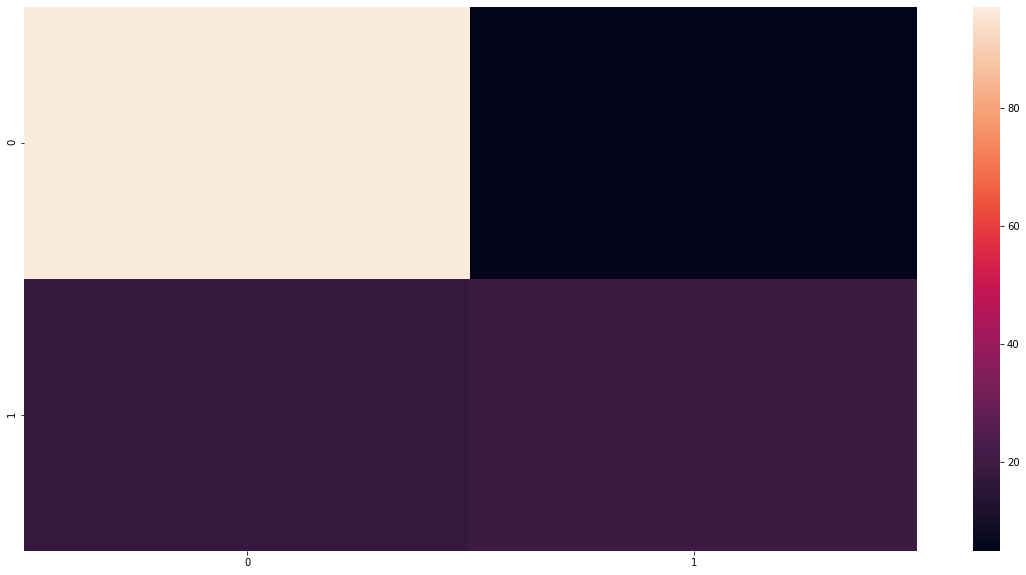

In [29]:
# Import the confusion_matrix function from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix

# Use the trained Logistic Regression model (lr) to predict the target labels for the test data
yp = lr.predict(xtest)

# Generate the confusion matrix comparing actual labels (ytest) with predicted labels (yp)
c = confusion_matrix(ytest, yp)

# Create a large figure for visualizing the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(c,ax=ax)

# Why?
# The confusion matrix shows the number of correct and incorrect predictions made by the Logistic Regression model.
# It helps identify how well the model distinguishes between customers who default and those who don’t.
# True positives and true negatives indicate correct classifications, while false positives and false negatives indicate errors.
# Visualizing the confusion matrix with a heatmap makes it easier to interpret and identify model performance issues.

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

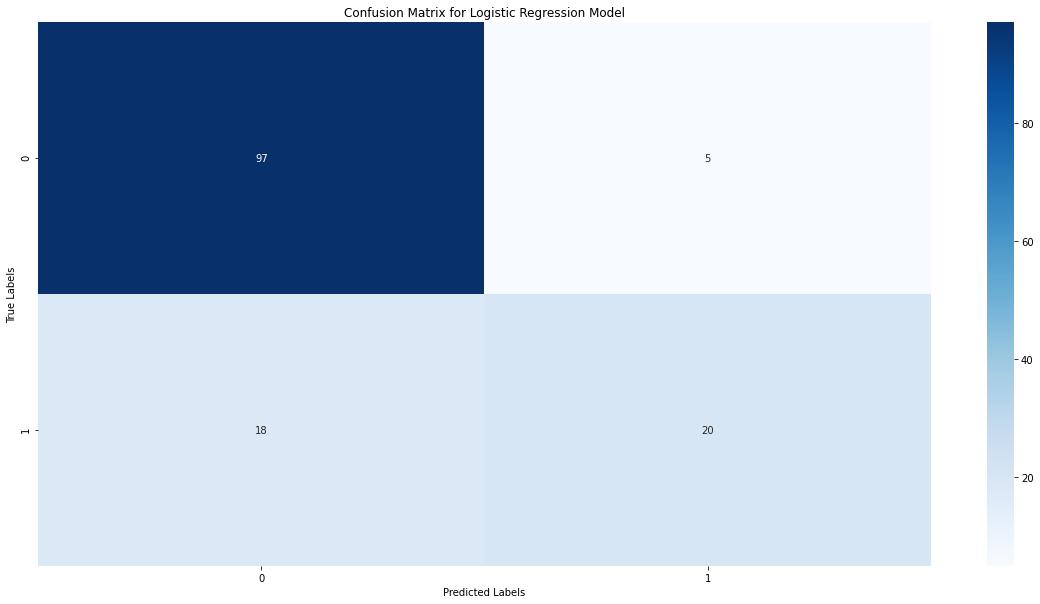

In [30]:
from sklearn.metrics import confusion_matrix

# Predict using the trained Logistic Regression model
yp = lr.predict(xtest)

# Generate the confusion matrix
c = confusion_matrix(ytest, yp)

# Create a large figure and heatmap with annotations
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(c, ax=ax, annot=True, fmt='d', cmap='Blues')

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression Model')

# Why?
# Adding annotations shows the exact counts of each classification outcome (true positives, false positives, etc.).
# Labels make the chart self-explanatory, and color highlights differences in counts.
# This makes it easier to interpret model performance at a glance.